大数定律（law of large numbers）： 随着投掷次数的增加，这个估计值会越来越接近真实的潜在概率

分布（distribution）：对事件 概率分配
将概率分配给一些离散选择的分布称为多项分布（multinomial distribution）


In [1]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l


为了抽取一个样本，传入一个概率向量
i位值是采样结果中出现的次数

In [2]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 1., 0., 0., 0., 0.])

In [3]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([2., 1., 5., 1., 0., 1.])

In [5]:
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 出现次数/总次数 相对频率作为估计值

tensor([0.1610, 0.1520, 0.1750, 0.1650, 0.1760, 0.1710])

500组实验，每组抽取10个样本。

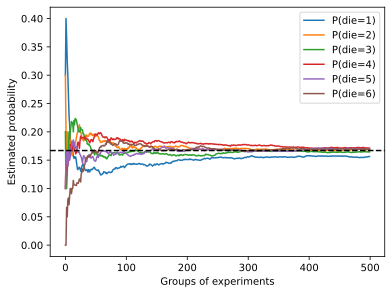

In [6]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

离散（discrete）随机变量  ：常用
连续（continuous）随机变量 ：量化为密度（density）。 高度恰好为1.80米的概率为0，但密度不是0

# 处理多个随机变量
## 联合概率（joint probability）$P(A=a,B=b)$
$A=a$和$B=b$同时满足的概率是多少？
## 条件概率
$0 \leq \frac{P(A=a, B=b)}{P(A=a)} \leq 1$。
它是$B=b$的概率，前提是$A=a$已发生。
前提 即 已经有的条件 环境
## 乘法法则（multiplication rule ）
$P(A, B) = P(B \mid A) P(A)$
## 贝叶斯定理（Bayes' theorem）
$$P(A \mid B) = \frac{P(B \mid A) P(A)}{P(B)}.$$
## 求和法则（sum rule）
边际化（marginalization）
## 独立
$A \perp  B$。
## 条件独立
$P(A, B \mid C) = P(A \mid C)P(B \mid C)$
$A \perp B \mid C$